In [62]:
import warnings 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
pd.set_option('display.max_columns', None)   #hiển thị tất cả các cột dữ liệu
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

In [150]:
train = pd.read_csv('train.csv',sep=";")
test= pd.read_csv('test.csv',sep=";")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [64]:
train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5,Fiat Avventura Power Up 1.3 Emotion,2015,500000,96500,Diesel,Individual,Manual,First Owner,20.5 kmpl,1248 CC,91.72 bhp,209Nm@ 2000rpm,5.0
6,Hyundai i10 Magna 1.2 iTech SE,2013,325000,70000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0
7,Hyundai EON D Lite Plus,2017,270000,50000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
8,Mahindra Verito 1.5 D4 BSIII,2011,174000,100000,Diesel,Individual,Manual,Second Owner,21.0 kmpl,1461 CC,64.1 bhp,160Nm@ 2000rpm,5.0
9,Hyundai i10 Magna 1.2 iTech SE,2012,270000,56000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [66]:
train.shape

(6000, 13)

### check null

In [67]:
train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [68]:
train=train.dropna(axis=0, how='any')

## engine

In [69]:
train['engine'] = train['engine'].str.split().str[0]
train['engine'] = train['engine'].astype(float)
#train['engine'] = train['engine'].fillna(train['engine'].mean())

test['engine'] = test['engine'].str.split().str[0]
test['engine'] = test['engine'].astype(float)
test['engine'] = test['engine'].fillna(train['engine'].mean())

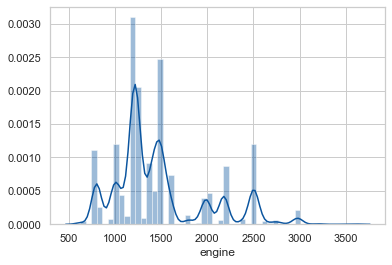

In [70]:
sns.distplot(train['engine'])

In [71]:
train['engine'].value_counts()

1248.0    735
1197.0    611
796.0     336
998.0     322
2179.0    302
         ... 
2650.0      1
2596.0      1
1590.0      1
1390.0      1
1451.0      1
Name: engine, Length: 119, dtype: int64

## mileage

In [72]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return x
    
train['mileage'] = train['mileage'].apply(mileage_convert)
#train['mileage'] = train['mileage'].fillna(train['mileage'].mean())

test['mileage'] = test['mileage'].apply(mileage_convert)
test['mileage'] = test['mileage'].fillna(test['mileage'].mean())


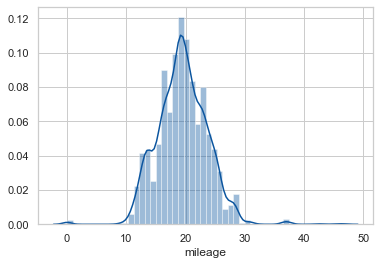

In [73]:
sns.distplot(train['mileage'])

# km_driven

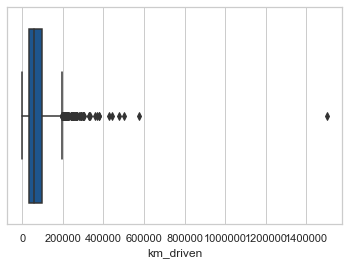

In [74]:
sns.boxplot(train['km_driven'])

# max_power

In [76]:
train['max_power'].value_counts()

74 bhp       272
81.80 bhp    159
88.5 bhp     149
67 bhp       123
46.3 bhp     121
            ... 
282 bhp        1
144 bhp        1
 bhp           1
53.26 bhp      1
156 bhp        1
Name: max_power, Length: 303, dtype: int64

In [77]:
train['max_power'] = train['max_power'].str.split().str[0]
train['max_power'] = train['max_power'].str.replace(' bhp','0.0')
train['max_power'] = pd.to_numeric(train['max_power'], errors='coerce')
#train['max_power'].replace(0.0,np.nan,inplace=True)
#train['max_power'].fillna(train['max_power'].median(),inplace=True)

test['max_power'] = test['max_power'].str.split().str[0]
test['max_power'] = pd.to_numeric(test['max_power'], errors='coerce')
test['max_power'].replace(0.0,np.nan,inplace=True)
test['max_power'].fillna(train['max_power'].median(),inplace=True)


In [78]:
test['seats']=test['seats'].astype(float)
test.seats = test.seats.fillna(5.0)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        6000 non-null   float64
 9   engine         6000 non-null   float64
 10  max_power      6000 non-null   float64
 11  torque         5840 non-null   object 
 12  seats          6000 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 609.5+ KB


### check duplicate

In [80]:
train.duplicated().sum()

756

In [81]:
train.loc[train.duplicated(), :]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
70,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.4,620Nm@ 2000-2500rpm,4.0
90,Maruti Baleno Alpha 1.3,2018,740000,38817,Diesel,Dealer,Manual,First Owner,27.39,1248.0,74.0,190Nm@ 2000rpm,5.0
98,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.5,153Nm@ 3800rpm,5.0
111,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177.0,430Nm@ 1750-2500rpm,5.0
123,Maruti Baleno Alpha 1.3,2018,740000,38817,Diesel,Dealer,Manual,First Owner,27.39,1248.0,74.0,190Nm@ 2000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.00,1197.0,81.8,113Nm@ 4200rpm,5.0
5984,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.20,1199.0,88.7,110Nm@ 4800rpm,5.0
5985,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.00,1197.0,81.8,113Nm@ 4200rpm,5.0
5988,Tata Indigo eCS LX BSIV,2012,246000,35000,Diesel,Individual,Manual,Second Owner,23.03,1396.0,69.0,140Nm@ 1800-3000rpm,5.0


In [82]:
train=train.drop_duplicates()

In [83]:
#print(train.shape)
#zero_seat = train[train['seats'] == 0].index
#train.drop(zero_seat, axis=0, inplace=True)
#print(train.shape)

# outlier


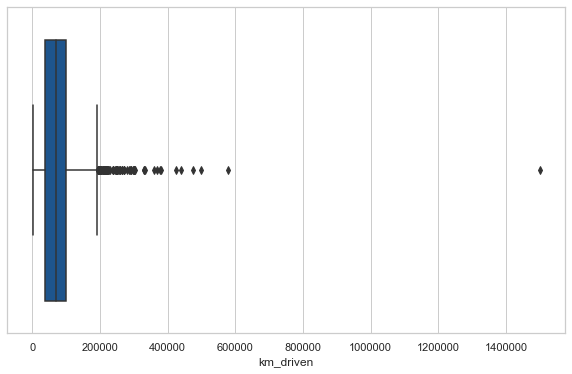

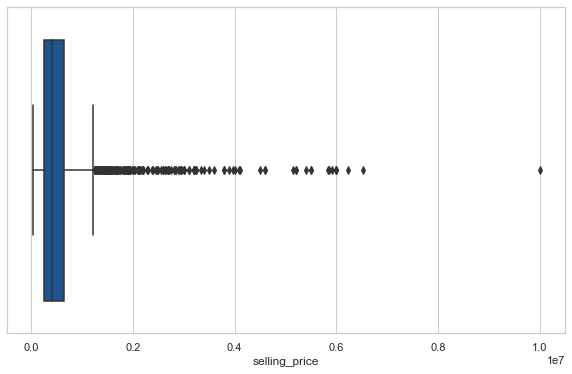

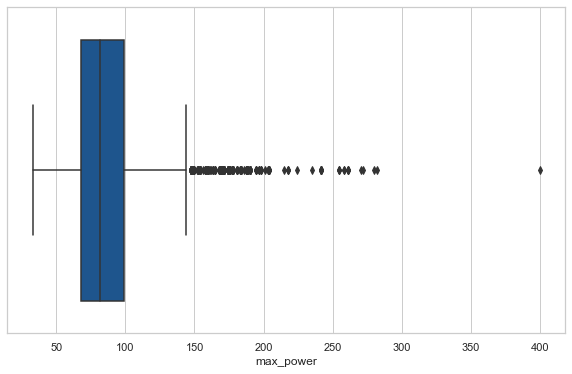

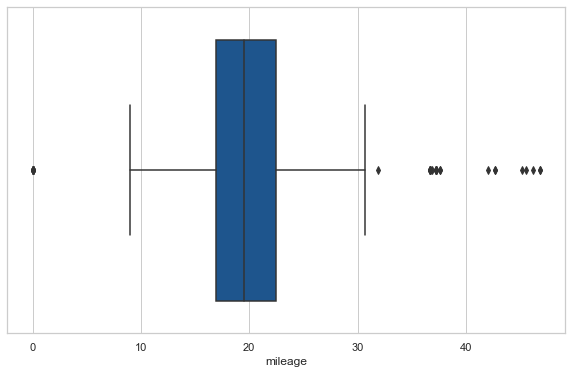

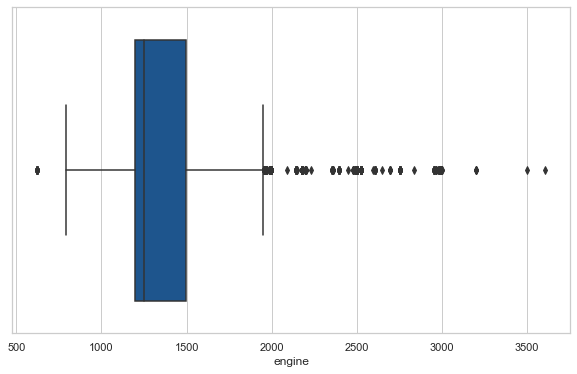

In [84]:
features_ch=['km_driven','selling_price','max_power','mileage','engine']
for i in features_ch:
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=train,ax=ax)

In [85]:
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(train, 'km_driven')
print('Lower end outer fence: ', outer_fence_le)

print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -144000.0
Upper end outer fence:  283000.0


In [86]:
print('90% quantile:   ', train['km_driven'].quantile(0.90))       
print('92.5% quantile: ', train['km_driven'].quantile(0.925))      
print('95% quantile:   ', train['km_driven'].quantile(0.95))       
print('97.5% quantile: ', train['km_driven'].quantile(0.975))      
print('99% quantile:   ', train['km_driven'].quantile(0.99))       
print('99.9% quantile: ', train['km_driven'].quantile(0.999))

90% quantile:    120000.0
92.5% quantile:  140000.0
95% quantile:    155000.0
97.5% quantile:  190925.00000000017
99% quantile:    243419.99999999825
99.9% quantile:  414822.00000002375


In [87]:
#train['km_driven'] = winsorize(train['km_driven'].values, limits = [0, 0.01]).data

In [88]:
out_row = np.where(train['km_driven']>600000)

for i in out_row:
    train.drop(i,inplace = True)

km_driven_mean=train.km_driven.mean()
train['km_driven']=[i if i<(1200000) else float(int(km_driven_mean)) for i in train.km_driven]

In [89]:
#train['selling_price'] =winsorize(train['selling_price'].values, limits = [0, 0.01]).data

In [90]:
#out_row = np.where(train['max_power']<=5)

#for i in out_row:
  #  train.drop(i,inplace = True)
#max_power_mean=train.max_power.mean()
#train['max_power']=[i if i<(400) else float(int(max_power_mean)) for i in train.max_power]

In [91]:
#mileage_mean=train.mileage.mean()
#train['mileage']=[i if i>5 else float(int(mileage_mean)) for i in train.mileage]

In [92]:
train.shape

(5243, 13)

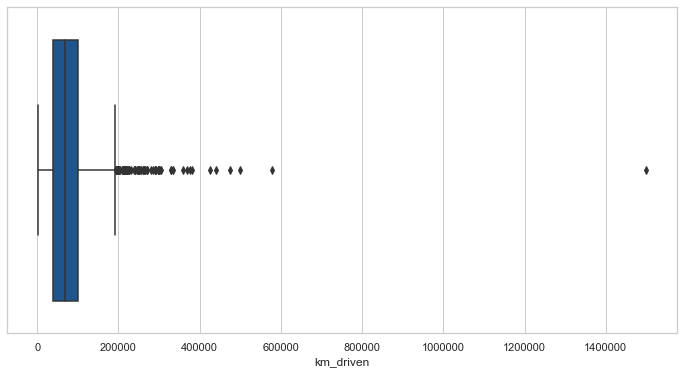

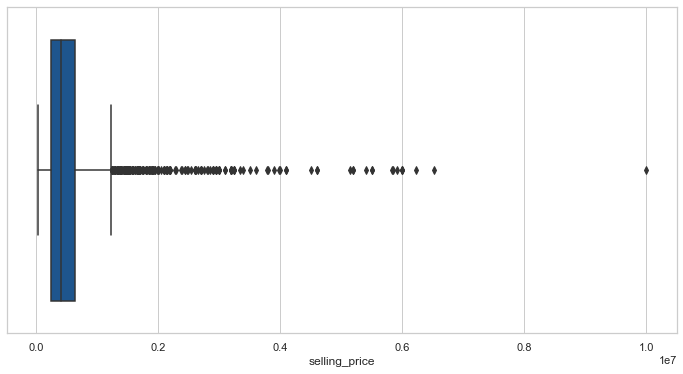

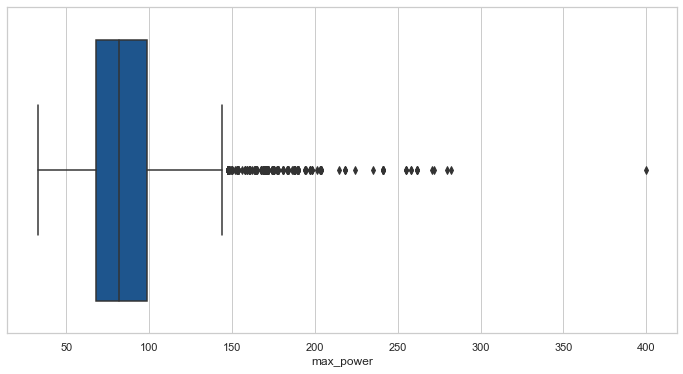

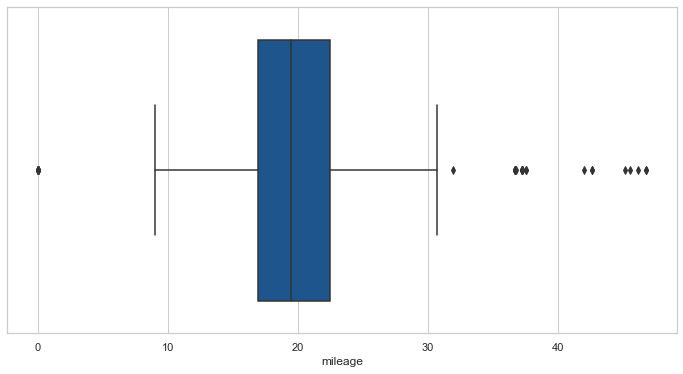

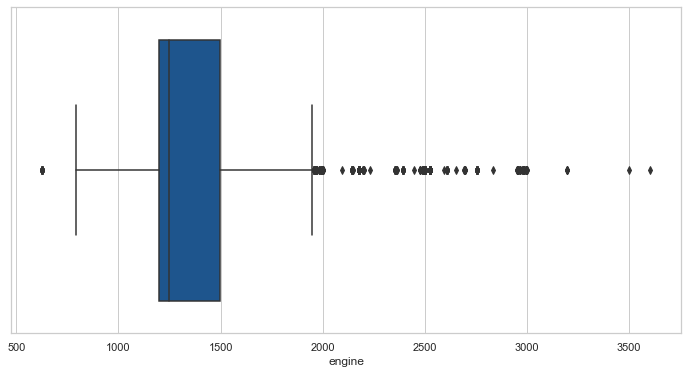

In [93]:
for i in features_ch:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=train,ax=ax)

# encoding


In [115]:
train1=train.copy()

In [116]:
train1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0


In [117]:
train1['fuel'].value_counts()

Diesel    2863
Petrol    2309
CNG         44
LPG         27
Name: fuel, dtype: int64

In [119]:
Fuel_t = train1[['fuel']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()



,fuel_Diesel,fuel_LPG,fuel_Petrol
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [120]:
var = 'transmission'
train1[var].value_counts()

Manual       4789
Automatic     454
Name: transmission, dtype: int64

In [122]:
Transmission = train1[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,transmission_Manual
0,1
1,1
2,0
3,1
4,0


In [126]:
var = 'owner'
train1[var].value_counts()

First Owner             3242
Second Owner            1476
Third Owner              402
Fourth & Above Owner     118
Test Drive Car             5
Name: owner, dtype: int64

In [127]:
train1.replace({"First Owner":1,"Second Owner":2,
                "Third Owner": 3,"Fourth & Above Owner":4,
               "Test Drive Car" :1},inplace=True)
train1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,2,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,1,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,1,18.00,1969.0,190.00,400Nm,5.0


In [128]:
#current = 2021
#train1['num_year'] = current - train1['year']
train1.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0


In [129]:
train1.drop(['torque','name','mileage','seller_type','seats'],axis=1,inplace=True)
final_train= pd.concat([train1,Fuel_t,Transmission],axis=1)
final_train.drop(["fuel","transmission"],axis=1, inplace=True)
final_train.head()


,year,selling_price,km_driven,owner,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2018,850000,9500,1,1497.0,108.50,1,0,0,1
1,2018,750000,30000,1,1396.0,88.76,1,0,0,1
2,2015,1500000,80000,2,2982.0,168.50,1,0,0,0
3,2015,795000,35000,1,1591.0,121.30,0,0,1,1
4,2019,3800000,20000,1,1969.0,190.00,1,0,0,0


In [130]:
final_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5243 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 5243 non-null   int64  
 1   selling_price        5243 non-null   int64  
 2   km_driven            5243 non-null   int64  
 3   owner                5243 non-null   int64  
 4   engine               5243 non-null   float64
 5   max_power            5243 non-null   float64
 6   fuel_Diesel          5243 non-null   uint8  
 7   fuel_LPG             5243 non-null   uint8  
 8   fuel_Petrol          5243 non-null   uint8  
 9   transmission_Manual  5243 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 307.2 KB


# Final Features Selection

In [131]:
final_train.columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'engine', 'max_power',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'transmission_Manual'],
      dtype='object')

In [133]:
X = final_train.loc[:,['year', 'km_driven', 'owner', 'engine', 'max_power',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'transmission_Manual']]
X.shape

(5243, 9)

In [134]:
Y= final_train.loc[:,['selling_price']]
Y.head()

,selling_price
0,850000
1,750000
2,1500000
3,795000
4,3800000


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traning set: ",rf_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,Y_test))

Accuracy on Traning set:  0.9829907347094243
Accuracy on Testing set:  0.8956795164369951


In [137]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(Y_test, y_pred))

Mean Absolute Error      :  87317.04172197772
Mean Squared  Error      :  27347653443.03108
Root Mean Squared  Error :  165371.25942264296
R Squared Error          :  0.8956795164369951


#  prepare test

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2128 non-null   float64
 9   engine        2128 non-null   float64
 10  max_power     2128 non-null   float64
 11  torque        2066 non-null   object 
 12  seats         2128 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 216.2+ KB


In [139]:
test.head(10)

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.80,1497.0,117.30,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.10,1197.0,82.00,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.70,1498.0,98.96,215Nm@ 1750-2500rpm,5.0
5,6,Maruti Omni 8 Seater BSII,2008,120000,Petrol,Individual,Manual,Second Owner,19.70,796.0,35.00,6.1kgm@ 3000rpm,8.0
6,7,Maruti Wagon R VXI Minor,2007,70000,Petrol,Individual,Manual,Third Owner,18.90,1061.0,67.00,84Nm@ 3500rpm,5.0
7,8,Hyundai Accent Executive,2011,70000,Petrol,Individual,Manual,First Owner,16.36,1495.0,93.70,124.6Nm@ 3500rpm,5.0
8,9,Chevrolet Sail 1.3 LS,2013,56000,Diesel,Dealer,Manual,First Owner,22.10,1248.0,74.00,190Nm@ 1750rpm,5.0
9,10,Hyundai Elite i20 Magna Plus BSIV,2019,3500,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.86,117nm@ 4000rpm,5.0


In [140]:
test.isnull().sum()

Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque          62
seats            0
dtype: int64

In [141]:
var = 'fuel'
Fuel_t = test[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


In [142]:

var = 'transmission'
Transmission = test[var]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Manual
0,0
1,1
2,1
3,1
4,1


In [144]:
var = 'owner'
test.replace({"First Owner":1,"Second Owner":2,
                    "Third Owner": 3,"Fourth & Above Owner":4,
                   "Test Drive Car":1},inplace=True)
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,1,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,1,17.80,1497.0,117.30,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,1,19.10,1197.0,82.00,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,1,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,1,21.70,1498.0,98.96,215Nm@ 1750-2500rpm,5.0


In [145]:
final_test=test.copy()
final_test= pd.concat([test,Fuel_t,Transmission],axis=1)


In [146]:
final_test.drop(["Id","mileage","name","fuel","seller_type","transmission","torque","seats"],axis=1, inplace=True)
final_test.head()

,year,km_driven,owner,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,Manual
0,2016,11000,1,1598.0,103.50,0,0,1,0
1,2017,35000,1,1497.0,117.30,0,0,1,1
2,2014,80000,1,1197.0,82.00,0,0,1,1
3,2014,145241,1,2179.0,120.00,1,0,0,1
4,2015,92651,1,1498.0,98.96,1,0,0,1


In [147]:
predicted = rf_reg.predict(final_test)
Sample = pd.DataFrame(data={'Id': test['Id'], 'Predicted': predicted})

Sample.head()

,Id,Predicted
0,1,648550.00
1,2,827480.00
2,3,387399.98
3,4,600950.00
4,5,521239.97


In [148]:
filename = 'predict12.csv'

Sample.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: predict12.csv


In [149]:
print(Y_test[:10])

      selling_price
365          600000
325          400000
5994         725000
430         3600000
2340         330000
1763         450000
4547         550000
5656         200000
1306         155000
4492         155000
